# Experimento Eletivo: Medição da espessura de um fio de cabelo por difração

$$d = \frac{2\cdot m\cdot\lambda\sqrt{x^2 + (y_m/2)^2}}{y_m}$$
$$y_m = \frac{Y_{\text{max}}+Y_{\text{min}}}{2}$$

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.medicoes import Me, average, sqrt, list2numpy

# Funções para calcular a espussara do fio de cabelo
def espessura(lambda_:Me, x:Me, y_m:Me, m:int) -> Me:
    return 2*m*lambda_*sqrt(x**2+(y_m/2)**2)/y_m

def espessura_arr(lambda_:Me, x:Me, y:list[Me]):
    arr:list[Me] = []
    for m, y_m in enumerate(y):
        arr.append(espessura(lambda_, x, y_m, m+1))
    return arr

# Estilos dos gráficos
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

## Dados

In [54]:
lambda_ = Me(670, 10, 10**-9) # [Hz] - Frequência do laser 

def trena(m: float|int): # [cm] - Trena
    return Me(m, 0.1, 10**-2)
def regua(m: float|int): # [cm] - Regua
    return Me(m, 0.05, 10**-2)
def paqui(m: float|int): # [mm] - Paquimetro
    return Me(m, 0.05, 10**-3)
def micro(m: float|int): # [mm] - Micrometro
    return Me(m, 0.005, 10**-3)

pessoas = ["lucas", "pamela", "gabi"]
dados = {
    pessoas[0]: {
        "espessura_micrometro": None,
        "x": None,
        "y_arr": None,
        "d_arr": None
    },
    pessoas[1]: {
        "espessura_micrometro": None,
        "x": None,
        "y_arr": None,
        "d_arr": None
    },
    pessoas[2]: {
        "espessura_micrometro": None,
        "x": None,
        "y_arr": None,
        "d_arr": None
    },
}

### Cabelo Lucas

In [55]:
pessoa = pessoas[0]
dados[pessoa]["espessura_micrometro"] = micro(0.071)
dados[pessoa]["x"] = trena(267.75)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
dados[pessoa]["y_arr"] = [   # Distância entre os máximo de ordem m+1
    (paqui(53.55)+paqui(34.45))/2,
    (paqui(84.40)+paqui(64.60))/2,
    (paqui(114.90)+paqui(95.10))/2,
    (paqui(145.00)+paqui(127.20))/2,
    (regua(17.26)+regua(15.53))/2
]

dados[pessoa]["d_arr"] = espessura_arr(
    lambda_ = lambda_,
    x = dados[pessoa]["x"],
    y = dados[pessoa]["y_arr"]
)

### Cabelo Pamela

In [56]:
pessoa = pessoas[1]
dados[pessoa]["espessura_micrometro"] = micro(0.049)
dados[pessoa]["x"] = trena(264.7)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
dados[pessoa]["y_arr"] = [   # Distância entre os máximo de ordem m+1
    (paqui(101.20)+paqui(67.15))/Me(2),
    (paqui(155.10)+paqui(123.50))/Me(2),
    (regua(21.35)+regua(18.40))/Me(2)
]

dados[pessoa]["d_arr"] = espessura_arr(
    lambda_ = lambda_,
    x = dados[pessoa]["x"],
    y = dados[pessoa]["y_arr"]
)

### Cabelo Gabi

In [57]:
pessoa = pessoas[2]
dados[pessoa]["espessura_micrometro"] = micro(0.059)
dados[pessoa]["x"] = trena(264.7)-trena(30) # [m] - Distância do fio de cabelo com o anteparo
dados[pessoa]["y_arr"] = [   # Distância entre os máximo de ordem m+1
    (paqui(59.00)+paqui(37.80))/2,
    (paqui(90.75)+paqui(68.95))/2,
    (paqui(122.90)+paqui(102.20))/2,
    (regua(15.8)+regua(13.8))/2,
]

dados[pessoa]["d_arr"] = espessura_arr(
    lambda_ = lambda_,
    x = dados[pessoa]["x"],
    y = dados[pessoa]["y_arr"]
)

## Gráficos

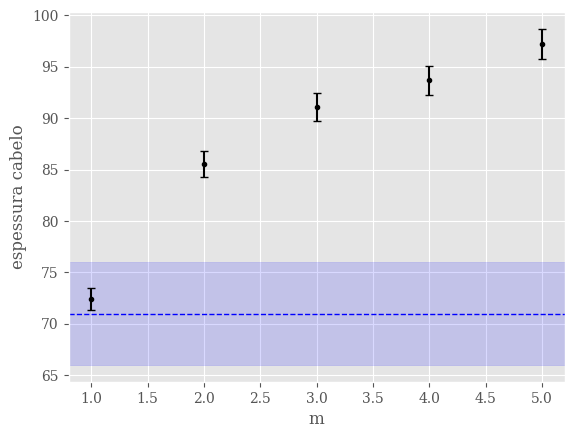

In [110]:
data = dados["lucas"]
d_arr, du_arr = list2numpy(data["d_arr"])
scale = 10**6

d_arr *= scale
du_arr *= scale

fig, ax = plt.subplots(1,1)
ax.errorbar(
    x = [v+1 for v, index in enumerate(d_arr)], 
    y = d_arr, 
    yerr = du_arr,
    fmt = ".",
    capsize=3,
    capthick=1,
    color = "black"
)
ax.set_xlim(ax.get_xlim())

ax.axhline(data["espessura_micrometro"].m*scale,0, ls = "--", color = "blue", linewidth=1)
# Faixa de incerteza semi-transparente
ax.fill_between(
    x=np.array(ax.get_xlim()),  # Obtém os limites do eixo x para preencher toda a largura do gráfico
    y1=(data["espessura_micrometro"].m - data["espessura_micrometro"].u)*scale,
    y2=(data["espessura_micrometro"].m + data["espessura_micrometro"].u)*scale,
    color='blue',
    alpha=0.15  # Define a transparência da faixa de incerteza
)

ax.set_xlabel('m')
ax.set_ylabel('espessura cabelo')
ax.set_title('')
plt.show()

#plt.savefig('grafico_preliminar', dpi=300, bbox_inches='tight', format='SVG')

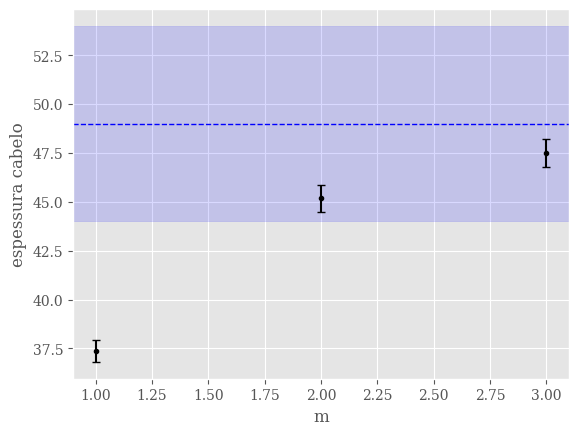

In [111]:
data = dados["pamela"]
d_arr, du_arr = list2numpy(data["d_arr"])
scale = 10**6

d_arr *= scale
du_arr *= scale

fig, ax = plt.subplots(1,1)
ax.errorbar(
    x = [v+1 for v, index in enumerate(d_arr)], 
    y = d_arr, 
    yerr = du_arr,
    fmt = ".",
    capsize=3,
    capthick=1,
    color = "black"
)
ax.set_xlim(ax.get_xlim())

ax.axhline(data["espessura_micrometro"].m*scale,0, ls = "--", color = "blue", linewidth=1)
# Faixa de incerteza semi-transparente
ax.fill_between(
    x=np.array(ax.get_xlim()),  # Obtém os limites do eixo x para preencher toda a largura do gráfico
    y1=(data["espessura_micrometro"].m - data["espessura_micrometro"].u)*scale,
    y2=(data["espessura_micrometro"].m + data["espessura_micrometro"].u)*scale,
    color='blue',
    alpha=0.15  # Define a transparência da faixa de incerteza
)

ax.set_xlabel('m')
ax.set_ylabel('espessura cabelo')
ax.set_title('')
plt.show()

#plt.savefig('grafico_preliminar', dpi=300, bbox_inches='tight', format='SVG')

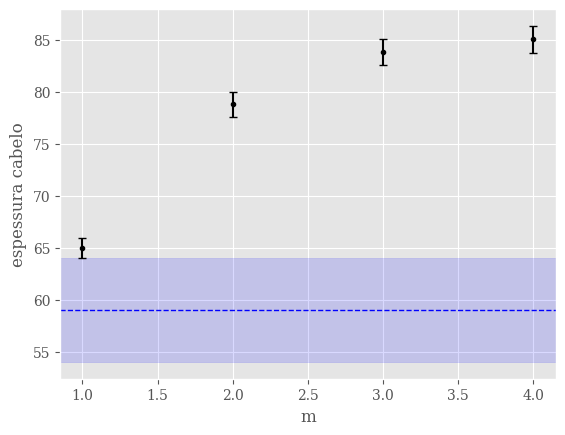

In [112]:
data = dados["gabi"]
d_arr, du_arr = list2numpy(data["d_arr"])
scale = 10**6

d_arr *= scale
du_arr *= scale

fig, ax = plt.subplots(1,1)
ax.errorbar(
    x = [v+1 for v, index in enumerate(d_arr)], 
    y = d_arr, 
    yerr = du_arr,
    fmt = ".",
    capsize=3,
    capthick=1,
    color = "black"
)
ax.set_xlim(ax.get_xlim())

ax.axhline(data["espessura_micrometro"].m*scale,0, ls = "--", color = "blue", linewidth=1)
# Faixa de incerteza semi-transparente
ax.fill_between(
    x=np.array(ax.get_xlim()),  # Obtém os limites do eixo x para preencher toda a largura do gráfico
    y1=(data["espessura_micrometro"].m - data["espessura_micrometro"].u)*scale,
    y2=(data["espessura_micrometro"].m + data["espessura_micrometro"].u)*scale,
    color='blue',
    alpha=0.15  # Define a transparência da faixa de incerteza
)

ax.set_xlabel('m')
ax.set_ylabel('espessura cabelo')
ax.set_title('')
plt.show()

#plt.savefig('grafico_preliminar', dpi=300, bbox_inches='tight', format='SVG')